## Analyze load testing

In [1]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
import pandas as pd
from scripts import test_data
import timeit

In [2]:
def test_dataset(row_count):
    raw_data = test_data.test_dataset(row_count)
    df = pd.DataFrame(raw_data)
    df.set_index('id')
    dataset = Dataset.from_pandas(df)
    dataset.set_attribute("id", AttributeType.IDENTIFYING)
    return dataset

In [3]:
def run_test(dataset):
    risk_profile = con.risk_profile(dataset)

### 2. Run tests

In [10]:
con = AaaS("http://localhost:8080")
batches = range(1000, 1000000, 10000)
result = {}
for batch in batches:
    elapsed_time = timeit.timeit(f"run_test(dataset)",
                                 setup=f"dataset = test_dataset({batch})",
                                 globals=globals(),
                                 number=1)
    result[str(batch)] = elapsed_time
    

In [27]:
list(result.items())[:10]

[('1000', 0.04128657399996882),
 ('11000', 0.07052599100006773),
 ('21000', 0.11840702500012412),
 ('31000', 0.24821891100009452),
 ('41000', 0.25634062199969776),
 ('51000', 0.35165117799988366),
 ('61000', 0.5280745820000448),
 ('71000', 0.4340333259997351),
 ('81000', 0.6487141440002233),
 ('91000', 0.529915863000042)]

### 3. Generate rapport

In [16]:
result_df = pd.DataFrame.from_dict(result, orient="index", columns=["time"])

In [19]:
result_df.head()

,time
1000,0.041287
11000,0.070526
21000,0.118407
31000,0.248219
41000,0.256341


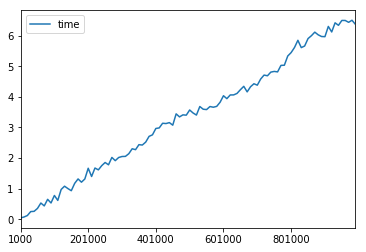

In [18]:
result_df.plot();